In [1]:
import pandas as pd
import numpy as np


In [2]:
efficacy_data=pd.read_csv(r"C:\Users\sreek\Documents\bayer\Scenario\efficacy.csv")
subject_data=pd.read_csv(r'C:\Users\sreek\Documents\bayer\Scenario\subject.csv')
randomization_data=pd.read_csv(r'C:\Users\sreek\Documents\bayer\Scenario\randomization.csv')


In [3]:
full_data=efficacy_data.set_index('subject').join(subject_data.set_index('subject'))\
.join(randomization_data.set_index('subject')).reset_index()

In [75]:
full_data.to_csv(r"C:\Users\sreek\Documents\bayer\Scenario\full_data.csv")


In [4]:
from statsmodels.discrete.discrete_model import Poisson


In [169]:
full_data.rename(columns={"eye.colour":"eye_colour","tissue.use":"tissue_use",\
                          "mucus.viscosity":"mucus_viscosity","previous.year":"previous_year","eye.colour":"eye_colour"},inplace=True)

In [170]:
full_data.head(4)

,subject,nosebleeds,duration,country,eye_colour,tissue_use,previous_year,mucus_viscosity,arm
0,359,4,365,A,BLUE,MEDIUM,2,1.304348,PLACEBO
1,241,0,365,A,BLUE,HIGH,2,0.869565,PLACEBO
2,409,1,365,A,BLUE,MEDIUM,2,0.434783,PLACEBO
3,271,0,285,A,BLUE,HIGH,3,0.869565,ACTIVE


In [161]:
full_data.nosebleeds.mean()

0.45045045045045046

In [160]:
full_data.nosebleeds.var()

0.7898643564557851

In [9]:
import statsmodels.formula.api as smf 
import statsmodels.api as sm

In [43]:
print ("Conditional mean"),
print (full_data.groupby('arm')['nosebleeds'].mean()),
print ("Conditional variance"),
print(full_data.groupby('arm')['nosebleeds'].var())

Conditional mean
arm
ACTIVE     0.381166
PLACEBO    0.520362
Name: nosebleeds, dtype: float64
Conditional variance
arm
ACTIVE     0.696400
PLACEBO    0.877993
Name: nosebleeds, dtype: float64


In [47]:
full_data.nosebleeds.value_counts()

0    322
1     75
2     26
3     12
4      8
5      1
Name: nosebleeds, dtype: int64

In [125]:
import matplotlib.pyplot as plt

In [53]:
%matplotlib inline

(array([ 322.,    0.,   75.,    0.,   26.,    0.,   12.,    0.,    8.,    1.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

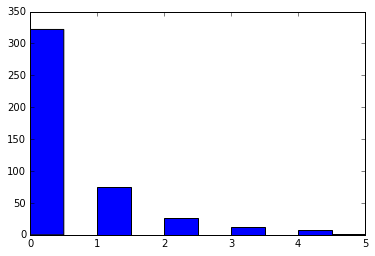

In [57]:
plt.hist(full_data.nosebleeds)

(array([ 347.,    0.,    0.,   77.,    0.,    0.,   15.,    0.,    0.,    5.]),
 array([ 2. ,  2.3,  2.6,  2.9,  3.2,  3.5,  3.8,  4.1,  4.4,  4.7,  5. ]),
 <a list of 10 Patch objects>)

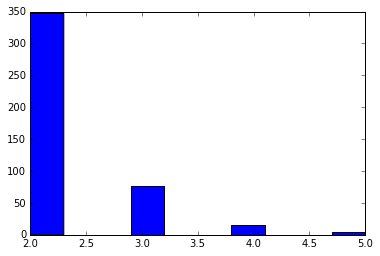

In [58]:
plt.hist(full_data.previous_year)

arm
ACTIVE     Axes(0.125,0.125;0.775x0.775)
PLACEBO    Axes(0.125,0.125;0.775x0.775)
Name: duration, dtype: object

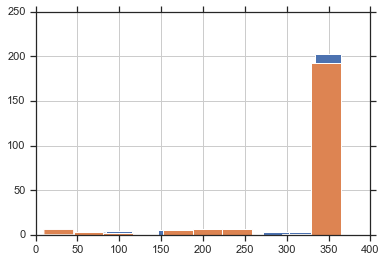

In [144]:
full_data.groupby('arm')['duration'].hist()

In [163]:
from statsmodels.discrete.discrete_model import NegativeBinomial
negativebinomial = NegativeBinomial.from_formula

In [182]:
md1=negativebinomial("full_data.nosebleeds~full_data.tissue_use+full_data.mucus_viscosity+C(full_data.arm)+full_data.previous_year",data=full_data,\
                     exposure=full_data.duration).fit()

Optimization terminated successfully.
         Current function value: 0.858133
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34


In [183]:
md1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      NegativeBinomial Regression Results                       
================================================================================
Dep. Variable:     full_data.nosebleeds   No. Observations:                  443
Model:                 NegativeBinomial   Df Residuals:                      438
Method:                             MLE   Df Model:                            4
Date:                  Fri, 17 Aug 2018   Pseudo R-squ.:                 0.02930
Time:                          20:59:44   Log-Likelihood:                -380.15
converged:                         True   LL-Null:                       -391.63
                                          LLR p-value:                 0.0001296
==================================================================================================
                                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
Intercept                         -7.7176      0.419    -18.420      0.000        -8.539    -6.896
full_data.tissue_use[T.MEDIUM]    -0.3976      0.194     -2.055      0.040        -0.777    -0.018
C(full_data.arm)[T.PLACEBO]        0.4852      0.192      2.528      0.011         0.109     0.861
full_data.mucus_viscosity         -0.0764      0.084     -0.914      0.361        -0.240     0.087
full_data.previous_year            0.4728      0.138      3.437      0.001         0.203     0.742
alpha                              1.4278      0.346      4.129      0.000         0.750     2.106
==================================================================================================
"""

In [62]:
import  statsmodels.api as sm
from statsmodels.miscmodels.count import PoissonZiGMLE

In [109]:
onemore_mdl=PoissonZiGMLE.from_formula("full_data.nosebleeds~full_data.mucus_viscosity+full_data.tissue_use \
                              + C(full_data.arm) +full_data.previous_year   ",data=full_data).fit()
onemore_mdl.summary()

Optimization terminated successfully.
         Current function value: 0.871797
         Iterations: 383
         Function evaluations: 601


<class 'statsmodels.iolib.summary.Summary'>
"""
                             PoissonZiGMLE Results                              
================================================================================
Dep. Variable:     full_data.nosebleeds   Log-Likelihood:                -386.21
Model:                    PoissonZiGMLE   AIC:                             782.4
Method:              Maximum Likelihood   BIC:                             802.9
Date:                  Fri, 17 Aug 2018                                         
Time:                          17:03:47                                         
No. Observations:                   443                                         
Df Residuals:                       438                                         
Df Model:                             4                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
Intercept                         -1.1277      0.378     -2.986      0.003        -1.868    -0.387
full_data.tissue_use[T.MEDIUM]    -0.2381      0.178     -1.341      0.180        -0.586     0.110
C(full_data.arm)[T.PLACEBO]        0.4564      0.171      2.667      0.008         0.121     0.792
full_data.mucus_viscosity         -0.0725      0.071     -1.018      0.309        -0.212     0.067
full_data.previous_year            0.4122      0.103      3.986      0.000         0.210     0.615
zi                                 0.0170      0.216      0.079      0.937        -0.407     0.441
==================================================================================================
"""

In [180]:
import statsmodels.api as sm
fam = sm.families.Poisson()
ind = sm.cov_struct.Independence()
pfmd2=sm.GEE.from_formula("nosebleeds~mucus_viscosity+C(tissue_use)+previous_year+country",groups=full_data.arm\
                          , data=full_data,cov_struct=ind, family=fam).fit()
print (pfmd2.summary())

                               GEE Regression Results                              
Dep. Variable:                  nosebleeds   No. Observations:                  443
Model:                                 GEE   No. clusters:                        2
Method:                        Generalized   Min. cluster size:                 221
                      Estimating Equations   Max. cluster size:                 222
Family:                            Poisson   Mean cluster size:               221.5
Dependence structure:         Independence   Num. iterations:                     7
Date:                     Fri, 17 Aug 2018   Scale:                           1.439
Covariance type:                    robust   Time:                         20:58:34
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  -0.7129      0.268     -2.659    

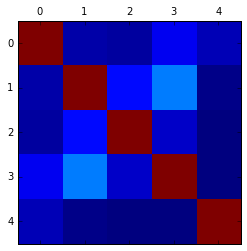

In [90]:
plt.matshow(full_data.corr())

In [15]:
%matplotlib inline

In [17]:
full_data.corr()

,subject,nosebleeds,duration,previous_year,mucus_viscosity
subject,1.000000,-0.007186,-0.017742,0.056820,0.003959
nosebleeds,-0.007186,1.000000,0.094586,0.210785,-0.035513
duration,-0.017742,0.094586,1.000000,0.019600,-0.046960
previous_year,0.056820,0.210785,0.019600,1.000000,-0.044330
mucus_viscosity,0.003959,-0.035513,-0.046960,-0.044330,1.000000


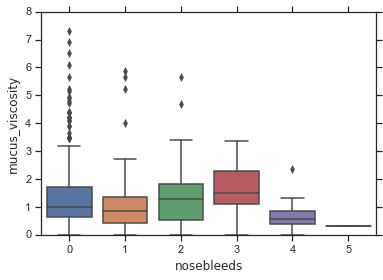

In [21]:
sns.boxplot(full_data.nosebleeds,full_data.mucus_viscosity)

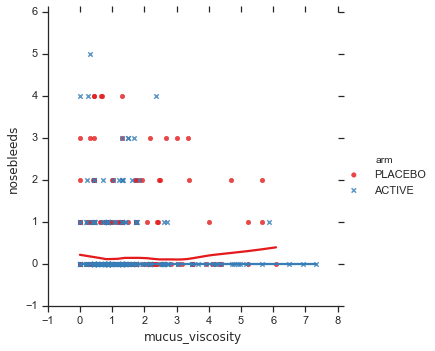

In [35]:
sns.lmplot(x='mucus_viscosity',y='nosebleeds',hue='arm',data=full_data,markers=["o", "x"],\
            palette="Set1",lowess=True)

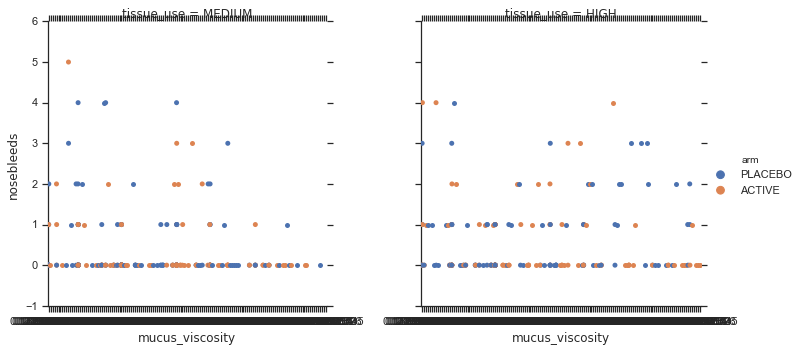

In [60]:
sns.catplot(data=full_data, x="mucus_viscosity", y="nosebleeds",hue='arm',col='tissue_use')